In [53]:
import pickle

# Specify the path to your .p file
file_path = "/Users/tianyichen/Desktop/Research /PhDresearch/Twitters/2024-06-10-tweets-with-text.p"

# Open the file in binary mode
with open(file_path, "rb") as file:
    # Load the data from the file
    data = pickle.load(file)


In [85]:
data.shape

(2904271, 11)

In [78]:
congress_info= data.iloc[:, [0,1,2,4,5]].drop_duplicates()

In [79]:
congress_info['party'].value_counts().sort_index()

R    609
D    561
I      4
Name: party, dtype: int64

In [80]:
congress_info['chamber'].value_counts().sort_index()

House     968
Senate    206
Name: chamber, dtype: int64

<AxesSubplot:title={'center':'Number of Tweets by Year'}>

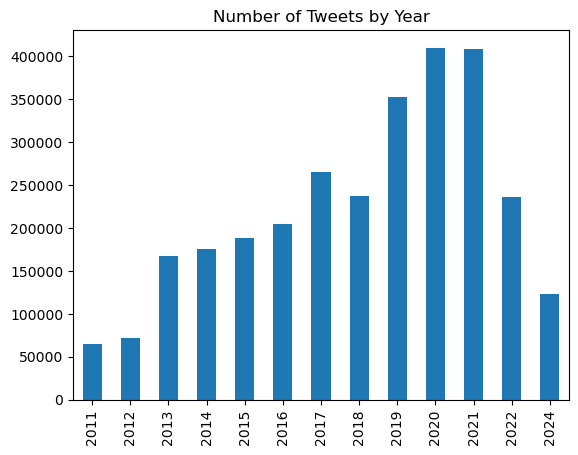

In [43]:
data['postedAt'].dt.year.value_counts().sort_index().plot(kind='bar', title='Number of Tweets by Year')

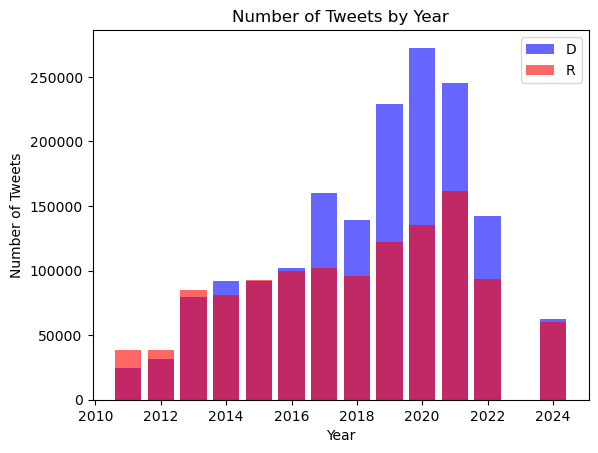

In [73]:
data_d = data.loc[data['party'] == 'D', 'postedAt'].dt.year.value_counts().sort_index()

data_r = data.loc[data['party'] == 'R', 'postedAt'].dt.year.value_counts().sort_index()

plt.bar(data_d.index, data_d.values, color='blue', alpha=0.6, label='D')
plt.bar(data_r.index, data_r.values, color='red', alpha=0.6, label='R')

plt.title('Number of Tweets by Year')
plt.xlabel('Year')
plt.ylabel('Number of Tweets')

plt.legend()

plt.show()


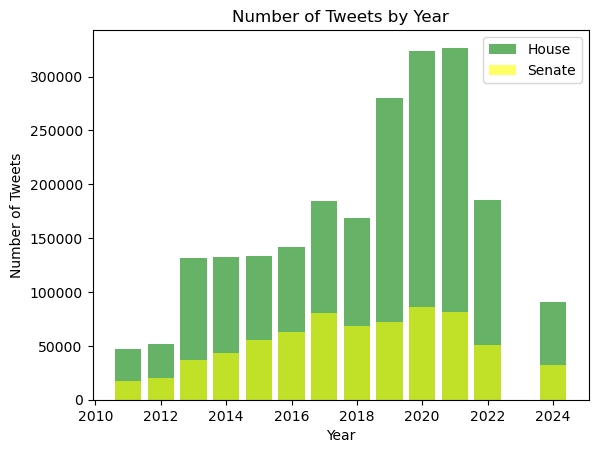

In [74]:
data_h = data.loc[data['chamber'] == 'House', 'postedAt'].dt.year.value_counts().sort_index()

data_s = data.loc[data['chamber'] == 'Senate', 'postedAt'].dt.year.value_counts().sort_index()

plt.bar(data_h.index, data_h.values, color='green', alpha=0.6, label='House')
plt.bar(data_s.index, data_s.values, color='yellow', alpha=0.6, label='Senate')

plt.title('Number of Tweets by Year')
plt.xlabel('Year')
plt.ylabel('Number of Tweets')

plt.legend()

plt.show()

In [52]:
data_d

2011     24309
2012     31804
2013     79270
2014     91692
2015     92277
2016    102079
2017    160351
2018    139001
2019    228622
2020    272587
2021    245432
2022    142205
2024     62281
Name: postedAt, dtype: int64

In [3]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from fuzzywuzzy import fuzz

In [4]:
data.head()

,name,party,twitter_lower,years,chamber,state,postedAt,source,tweetId,name_standardized,text
0,Josh Gottheimer D-NJ,D,repjoshg,2021_2022,House,NJ,2022-05-29 13:22:24.171,PolitWoops,1530902377196314624,josh_gottheimer,Thanks to the Bipartisan Infrastructure Bill t...
1,Ed Markey D-MA,D,senmarkey,2011_2012,Senate,MA,2011-05-13 21:06:26.255,PolitWoops,69146505528868864,ed_markey,"Since COPPA in 98, kids more likely 2 be poked..."
2,Debbie Stabenow D-MI,D,senstabenow,2021_2022,Senate,MI,2022-03-02 01:14:27.293,PolitWoops,1498829050919411712,debbie_stabenow,My virtual guest at the State of the Union wil...
3,Ted Cruz R-TX,R,sentedcruz,2019_2020,Senate,TX,2019-10-31 16:48:33.055,PolitWoops,1189947274526384128,ted_cruz,.@tedcruz offering rare praise for Facebook on...
4,Dan Bishop R-NC,R,repdanbishop,2021_2022,House,NC,2021-08-25 00:15:49.917,PolitWoops,1430322991376834560,dan_bishop,


In [37]:
CJ=data.loc[data['name'] == 'Cornyn, John', :]
CJ.head()

,name,party,twitter_lower,years,chamber,state,postedAt,source,tweetId,name_standardized,text,postedAtyear
9657,"Cornyn, John",R,johncornyn,N/A,Senate,TX,2024-03-01 13:38:58,NOMIC,1763559556943069283,john_cornyn,Both chambers of the Alabama Legislature have ...,2024
16575,"Cornyn, John",R,johncornyn,N/A,Senate,TX,2024-02-28 18:20:02,NOMIC,1762905514529198227,john_cornyn,Senator McConnell's announcement that he will ...,2024
16827,"Cornyn, John",R,johncornyn,N/A,Senate,TX,2024-06-06 10:41:50,NOMIC,1798666605188268457,john_cornyn,Immigration Named Top U.S. Problem for Third S...,2024
19863,"Cornyn, John",R,johncornyn,N/A,Senate,TX,2024-03-31 13:05:15,NOMIC,1774422710413648237,john_cornyn,How culture trumps economic class as the new p...,2024
20179,"Cornyn, John",R,johncornyn,N/A,Senate,TX,2024-02-13 14:56:55,NOMIC,1757418581384474930,john_cornyn,,2024


In [15]:
data['postedAtyear'] = data['postedAt'].dt.year

In [27]:
data_num.groupby(['name', 'postedAtyear']).size()

name                 postedAtyear
Kenny Marchant R-TX  2011            1341
                     2012            1424
                     2013             500
                     2014             136
                     2015             155
                                     ... 
Cardenas, Tony       2019               0
                     2020               0
                     2021               0
                     2022               0
                     2024             101
Length: 15158, dtype: int64

In [28]:

data_num = data.drop('text', axis=1)

#data_num.head()

tweets_per_cp_year = data_num.groupby(['name', 'postedAtyear']).size().reset_index(name='tweets_count')

tweets_per_cp_year_pivot = tweets_per_cp_year.pivot(index='name', columns='postedAtyear', values='tweets_count')


In [31]:
congress_info= data.iloc[:, :4].drop_duplicates()

In [87]:
merged_df = pd.merge(congress_info, tweets_per_cp_year_pivot, on='name')
merged_df.head()



,name,party,twitter_lower,chamber,state,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2024
0,Josh Gottheimer D-NJ,D,repjoshg,House,NJ,0,0,0,0,0,0,543,1157,1885,2200,1938,1343,0
1,Ed Markey D-MA,D,senmarkey,Senate,MA,639,140,3,2,1320,1721,2793,1943,1181,1439,1713,914,0
2,Debbie Stabenow D-MI,D,senstabenow,Senate,MI,150,36,3,87,395,438,1248,742,726,599,1106,789,0
3,Ted Cruz R-TX,R,sentedcruz,Senate,TX,0,0,1721,1124,379,847,1244,1401,2193,3394,2636,1670,0
4,Dan Bishop R-NC,R,repdanbishop,House,NC,0,0,0,0,0,0,0,0,50,441,1576,1371,0


In [137]:


merged_df.loc[merged_df['party'] == 'D', 2011 ]

0         0
1       639
2       150
5         0
7         0
       ... 
1165      0
1166      0
1167      0
1169      0
1171      0
Name: 2011, Length: 561, dtype: int64

In [141]:
merged_df.loc[merged_df['party'] == 'D', 2011 ].sum() / merged_df.loc[merged_df['party'] == 'D', 2011 ].astype(bool).sum(), merged_df.loc[merged_df['party'] == 'R', 2011 ].sum() / merged_df.loc[merged_df['party'] == 'R', 2011 ].astype(bool).sum()

(252.76530612244898, 351.39449541284404)

In [142]:
merged_df.loc[merged_df['party'] == 'D', 2012 ].sum() / merged_df.loc[merged_df['party'] == 'D', 2012 ].astype(bool).sum(), merged_df.loc[merged_df['party'] == 'R', 2012 ].sum() / merged_df.loc[merged_df['party'] == 'R', 2012 ].astype(bool).sum()

(294.6697247706422, 320.3193277310924)

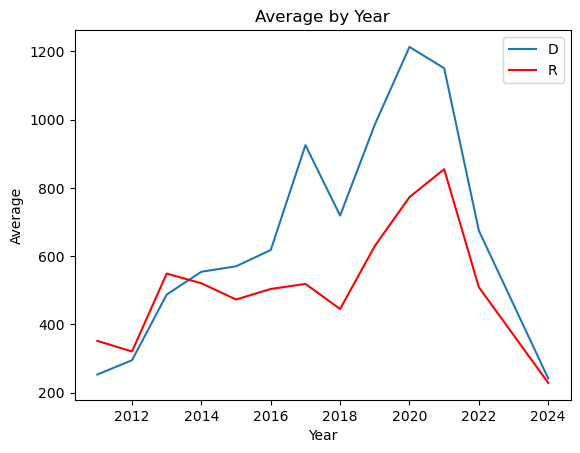

In [156]:
d_avg = []
r_avg = []
for year in range(2011, 2025):
    if year == 2023:
        continue
    d_avg.append(merged_df.loc[merged_df['party'] == 'D', year].sum() / merged_df.loc[merged_df['party'] == 'D', year].astype(bool).sum())
    r_avg.append(merged_df.loc[merged_df['party'] == 'R', year].sum() / merged_df.loc[merged_df['party'] == 'R', year].astype(bool).sum())


years = list(range(2011, 2025))
years.remove(2023)

plt.plot(years, d_avg, label='D')
plt.plot(years, r_avg, label='R',color='red')
plt.xlabel('Year')
plt.ylabel('Average')
plt.title('Average by Year')
plt.legend()
plt.show()


In [11]:
data.iloc[6]['text']

'This is an abysmal failure. Broke down the latest on Afghanistan with @997wtn: [link]'

In [6]:
congress_names, tweets_per_congress_person = np.unique(list(data['name']), return_counts=True)

In [134]:
data.iloc[0]['years']

'2021_2022'

In [142]:
congress_names.index(data['name'][11])
congress_names[congress_names.index(data['name'][11])]

'Jon Tester D-MT'

In [5]:
congress_names, tweets_per_congress_person = np.unique(list(data['name']), return_counts=True)
congress_names = list(congress_names)
congress_handles = [list(data['twitter_lower'][data['name'] == cn])[0] for cn in congress_names]

party_by_congress_person = [-1 for cp in congress_names]
chamber_by_congress_person = [-1 for cp in congress_names]

tweets_per_cp_2011= [0 for cp in congress_names]
tweets_per_cp_2012= [0 for cp in congress_names]
tweets_per_cp_2013= [0 for cp in congress_names]
tweets_per_cp_2014= [0 for cp in congress_names]
tweets_per_cp_2015= [0 for cp in congress_names]
tweets_per_cp_2016= [0 for cp in congress_names]
tweets_per_cp_2017= [0 for cp in congress_names]
tweets_per_cp_2018= [0 for cp in congress_names]
tweets_per_cp_2019= [0 for cp in congress_names]
tweets_per_cp_2020= [0 for cp in congress_names]
tweets_per_cp_2021= [0 for cp in congress_names]
tweets_per_cp_2022= [0 for cp in congress_names]
tweets_per_cp_2023= [0 for cp in congress_names]
tweets_per_cp_2024= [0 for cp in congress_names]

In [11]:
 'tweets_per_cp_'+str(year)

'tweets_per_cp_2024'

In [12]:
year=2024
new_variable_name = 'tweets_per_cp_'+str(year)

globals()[new_variable_name]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [13]:
start_year = 2013
end_year = 2024

for year in range(start_year, end_year + 1):
    years.append(str(year))

print(years)

NameError: name 'years' is not defined

In [16]:
data['postedAtyear'][1]

2011

In [190]:
for i in tqdm(range(len(data))):
    congress_name_index = congress_names.index(data['name'][i])
    if party_by_congress_person[congress_name_index] == -1:
        party_by_congress_person[congress_name_index] = data.loc[i,'party'].lower()

    year_of_tw= data['postedAtyear'][i]
    

    if chamber_by_congress_person[congress_name_index] == -1:
        chamber_by_congress_person[congress_name_index] = data.loc[i,'chamber'].lower()



100%|██████████| 2904271/2904271 [01:36<00:00, 30174.82it/s]


In [191]:
summary_df = pd.DataFrame({'name': congress_names, 'tweets_per_congress_person': tweets_per_congress_person,
                           'party': party_by_congress_person, 'tweets_per_cp_in_office': tweets_per_cp_in_office})

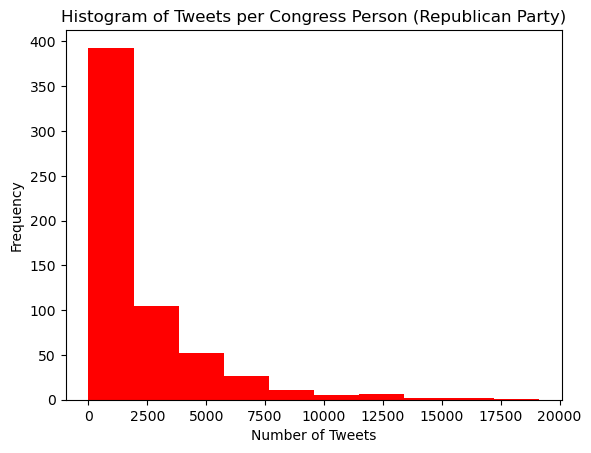

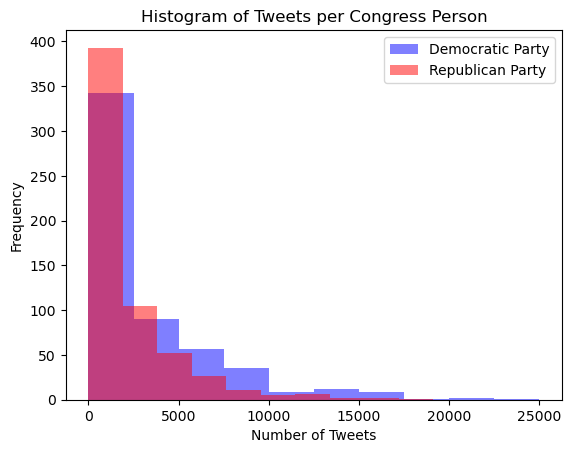

In [212]:
import matplotlib.pyplot as plt

r_tweets = summary_df.loc[summary_df['party'] == 'r', 'tweets_per_congress_person']
d_tweets = summary_df.loc[summary_df['party'] == 'd', 'tweets_per_congress_person']

plt.hist(r_tweets, color='red')
plt.xlabel('Number of Tweets')
plt.ylabel('Frequency')
plt.title('Histogram of Tweets per Congress Person (Republican Party)')
plt.show()
plt.hist(d_tweets, color='blue', alpha=0.5, label='Democratic Party') 
plt.hist(r_tweets, color='red', alpha=0.5, label='Republican Party') 
plt.xlabel('Number of Tweets') 
plt.ylabel('Frequency') 
plt.title('Histogram of Tweets per Congress Person') 
plt.legend() 
plt.show()



In [162]:
i=0
congress_name_index = congress_names.index(data['name'][i])

In [163]:
party_by_congress_person[congress_name_index] == -1

True

In [26]:
summary_df = pd.DataFrame({'name': congress_names, 'tweets_per_congress_person': tweets_per_congress_person})

merged_df = pd.merge(data,summary_df, on='name')



In [27]:
merged_df

,name,party,twitter_lower,years,chamber,state,postedAt,source,tweetId,name_standardized,text,tweets_per_congress_person
0,Josh Gottheimer D-NJ,D,repjoshg,2021_2022,House,NJ,2022-05-29 13:22:24.171,PolitWoops,1530902377196314624,josh_gottheimer,Thanks to the Bipartisan Infrastructure Bill t...,9066
1,Josh Gottheimer D-NJ,D,repjoshg,2021_2022,House,NJ,2022-06-17 19:32:09.785,PolitWoops,1537880799852105728,josh_gottheimer,"With steps I'm taking, we can fight collusion ...",9066
2,Josh Gottheimer D-NJ,D,repjoshg,2021_2022,House,NJ,2021-04-04 16:25:57.100,PolitWoops,1378745665216462848,josh_gottheimer,To everyone celebrating in New Jersey's Fifth ...,9066
3,Josh Gottheimer D-NJ,D,repjoshg,2021_2022,House,NJ,2022-03-08 16:43:01.541,PolitWoops,1501237060606337024,josh_gottheimer,"The Russians are killing innocent civilians, v...",9066
4,Josh Gottheimer D-NJ,D,repjoshg,2021_2022,House,NJ,2021-01-31 01:55:13.708,PolitWoops,1355696105015701504,josh_gottheimer,We need to get a new bipartisan COVID-19 packa...,9066
...,...,...,...,...,...,...,...,...,...,...,...,...
2904266,Lynn Woolsey D-CA,D,replynnwoolsey,2011_2012,House,CA,2012-02-28 15:29:49.524,PolitWoops,174516663188856832,lynn_woolsey,I'm at @EdWorkforce markup fighting against da...,3
2904267,Lynn Woolsey D-CA,D,replynnwoolsey,2011_2012,House,CA,2012-02-28 17:03:01.437,PolitWoops,174540117371916288,lynn_woolsey,I was pleased to cut the ribbon at the grand r...,3
2904268,Byron Donalds R-FL,R,repdonaldspress,2021_2022,House,FL,2021-01-06 17:27:00.582,PolitWoops,1346870898800943104,byron_donalds,.@ByronDonalds,1
2904269,"Johnson, Bill",R,repbilljohnson,N/A,House,OH,2024-01-19 14:25:41.000,NOMIC,1748351025600163875,bill_johnson,Yesterday was my last workday in the U.S. Hous...,2


In [17]:
list(tweets_per_congress_person).index(max(tweets_per_congress_person))


872

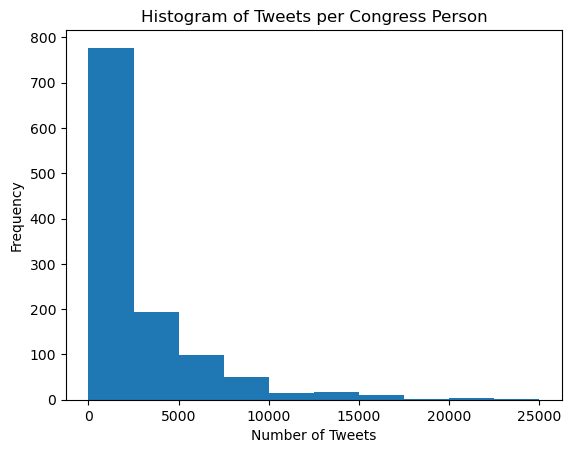

In [13]:
plt.hist(tweets_per_congress_person)
plt.xlabel('Number of Tweets')
plt.ylabel('Frequency')
plt.title('Histogram of Tweets per Congress Person')
plt.show()


In [3]:
import nomic
from nomic import AtlasDataset
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

nomic.login("nk-2LSEn5FB5h04Dn0pFLuZ9jDw7ZaMbPpYPV88wbKKASc")
dataset = AtlasDataset('hivemind/tweets-from-members-of-us-congress-from-all-time-updated-2024-06-10')


2024-06-26 09:48:44.730 | INFO     | nomic.dataset:__init__:829 - Loading existing dataset `hivemind/tweets-from-members-of-us-congress-from-all-time-updated-2024-06-10`.


In [4]:
embds = dataset.maps[0].embeddings.latent

KeyboardInterrupt: 